<a href="https://colab.research.google.com/github/icebearian/CS115-Mathematics-for-Computer-Science/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tập dữ liệu:** Social Network Ads.<br>
**Mô tả dữ liệu:** Gồm 400 tập dữ liệu thông tin khách hàng và cho biết khách hàng có mua hàng hay không.<br>
**Thuộc tính:**
+ **UserID**: Mã số định danh của người dùng.
+ **Gender**: Giới tính của người dùng.
+ **Age**: Độ tuổi người dùng.
+ **Estimated Salary**: Mức lương ước đoán của người dùng.
+ **Purchased**: Là một trong hai số 0 và 1. Số 0 cho biết khách
hàng không mua hàng và số 1 cho biết khách hàng có mua
hàng

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb75c4722e8>,
      dtype=object)

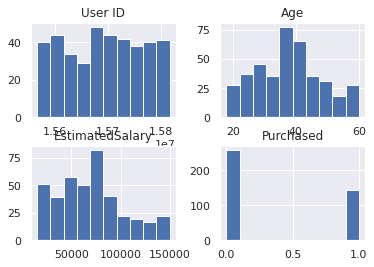

In [15]:
dataset.hist()

**Yêu cầu với 2 thuộc tính:**
+ Độ tuổi (Age)
+ Mức lương ước đoán (Estimated Salary)<br>
Dự đoán khách hàng sẽ mua hàng hay không?

# **Tiền xử lý dữ liệu**
> Ở đây ta cần chọn thuộc tính Input (X) là **Age** và **Estimated Salary** và Output (Y) là **Purchased**.

In [21]:
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:, 4].values

> Chia tập dữ liệu thành 2 bộ train **(80%)** và test **(20%)**.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 0)

Với mục đích:
+ Thuận tiện cho trực quan hóa kết quả sau khi huấn luyện.
+ Tăng hiệu quả khi huấn luyện trên mô hình SVM.
Ta chuẩn hóa dữ liệu về dạng có kỳ vọng bằng 0 và phương sai
bằng 1 ~ $N(0;1)$.<br>
Lớp **StandardScaler** trong module sklearn.preprocessing
đã được xây dựng sẵn để **chuẩn hóa dữ liệu**

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Trực quan hoá dữ liệu**

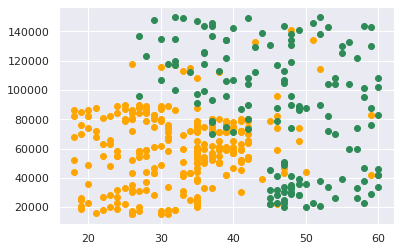

In [24]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def VisualizingDataset(X_, Y_):
  X1 = X_[:, 0]
  X2 = X_[:, 1]
  for i, label in enumerate(np.unique(Y_)):
    plt.scatter(X1[Y_ == label], X2[Y_ == label],color = ListedColormap(("orange", "seagreen"))(i))
VisualizingDataset(X, Y)
plt.show()

# **Huấn luyện mô hình**
> Sử dụng lớp SVC trong module sklearn.svm để huấn luyện mô
hình.<br>
> Ta sẽ sử dụng kernel Radian Basic Function cho Kernel SVM.
Kernel này được thiết lập với tham số kernel =
"rbf".


In [25]:
from sklearn.svm import SVC
classifier = SVC(kernel ="rbf")
#classifier = SVC(kernel='linear',random_state=0)
classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# **Trực quan hoá kết quả mô hình**
> Ta tạo một confusion matrix. Đây là một ma trận có kích thước là
(𝑝 × 𝑝) với 𝑝 là số phân lớp trong bài toán đang xét, ở đây là 2.<br>
> Phần tử ở dòng thứ 𝑖, cột thứ 𝑗 của confusion matrix biểu thị số
lượng phần tử có loại là 𝑖 và được phân vào loại 𝑗.<br>
> Hàm confusion_matrix trong module sklearn.metrics sẽ hỗ
trợ ta xây dựng confusion matrix.

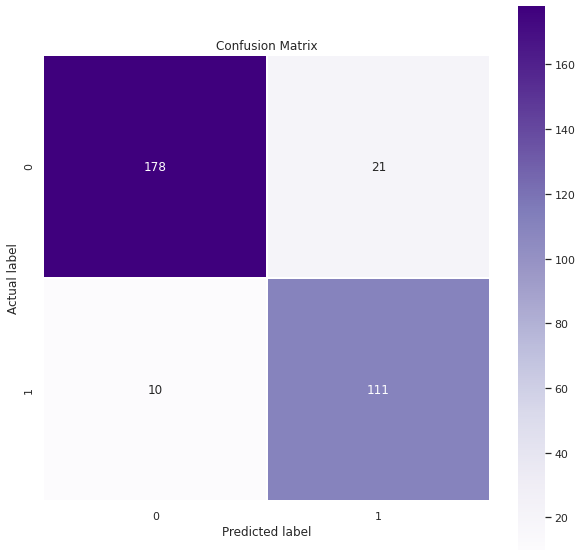

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_train, classifier.predict(X_train))
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True,fmt='.0f', linewidths = 0.5, square = True, cmap='Purples')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix')
plt.show()

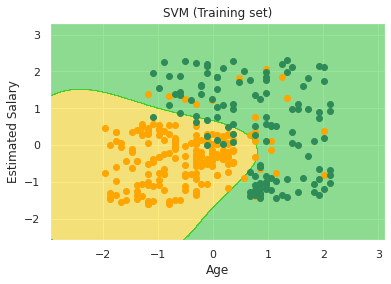

In [27]:
def VisualizingResult(model, X_):
  X1 = X_[:, 0]
  X2 = X_[:, 1]
  X1_range = np.arange(start= X1.min()-1, stop= X1.max()+1, step =0.01)
  X2_range = np.arange(start= X2.min()-1, stop= X2.max()+1, step =0.01)
  X1_matrix, X2_matrix = np.meshgrid(X1_range, X2_range)
  X_grid= np.array([X1_matrix.ravel(), X2_matrix.ravel()]).T
  Y_grid= model.predict(X_grid).reshape(X1_matrix.shape)
  plt.contourf(X1_matrix, X2_matrix, Y_grid, alpha = 0.5,cmap = ListedColormap(("gold", "limegreen")))
  
VisualizingResult(classifier, X_train)
VisualizingDataset(X_train, Y_train)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

# **Kiểm tra kết quả trên tập test**


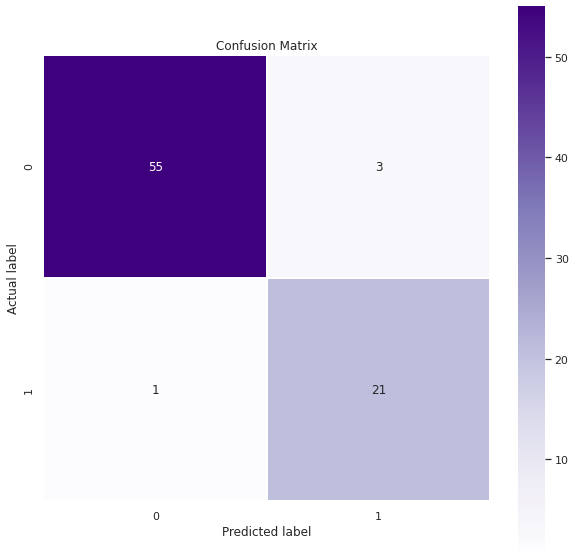

In [28]:
cm = confusion_matrix(Y_test, classifier.predict(X_test))
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True,fmt='.0f', linewidths = 0.5, square = True, cmap='Purples')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix')
plt.show()